<a href="https://colab.research.google.com/github/Jun-Liu-291/Deep-Learning-Model-/blob/master/SingleLayer_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from tensorflow import keras

%matplotlib inline
np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# load training set & test set
import os
from keras.preprocessing import image

base_path = '/content/drive/My Drive/dataset/cats&dogs/small_dataset'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

def get_data_labels(data_path, num):
  data = []
  labels = []
  i = 0
  for ani_name in os.listdir(data_path):
    temp_list = os.listdir(os.path.join(data_path, ani_name))

    for fn in temp_list[:num]:
      labels.append(i)
      img = image.load_img(os.path.join(data_path, ani_name, fn), target_size=(64, 64))

      x = image.img_to_array(img)
      data.append(x)
    i += 1
  
  return data, labels

x_train, y_train = get_data_labels(train_path, 256)
x_test, y_test = get_data_labels(test_path, 64)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print('Traning data shape is: ', x_train.shape)
print('Traning labels shape is: ', y_train.shape)
print('Test data shape is: ', x_test.shape)
print('Test labels shape is: ', y_test.shape)

Traning data shape is:  (512, 64, 64, 3)
Traning labels shape is:  (512,)
Test data shape is:  (128, 64, 64, 3)
Test labels shape is:  (128,)


In [ ]:
print(x_train[1].shape)

(64, 64, 3)


In [ ]:
# shuffle the Training data
def shuffle_data(X, Y):

  indices = np.array(range(X.shape[0]))
  import random
  random.shuffle(indices)
  image = np.zeros(X.shape)
  labels = np.zeros(Y.shape)
  for i in range(X.shape[0]):
    image[i] = X[indices[i]]
    labels[i] = Y[indices[i]]
  return image, labels

x_train, y_train = shuffle_data(x_train, y_train)

print('Traning data shape is: ', x_train.shape)
print('Traning labels shape is: ', y_train.shape)


Traning data shape is:  (210, 64, 64, 3)
Traning labels shape is:  (210,)


y =  0
This is a dog


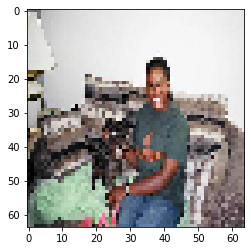

In [ ]:
# Example of a picture
index = 100
plt.imshow(image.array_to_img(x_train[index]))
print ("y = ", str(y_train[index]))
if(y_train[index] == 0): 
  print('This is a dog')
else:
  print('This is a cat')

In [ ]:
# Flatten data and labels
m_train = x_train.shape[0]
m_test = x_test.shape[0]
num_px = x_test.shape[1]

data_train = x_train.reshape(x_train.shape[0], -1).T
data_test = x_test.reshape(x_test.shape[0], -1).T

labels_test = y_test.reshape(1, m_test)
labels_train = y_train.reshape(1, m_train)

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(data_train.shape))
print ("train_set_y shape: " + str(labels_train.shape))
print ("test_set_x shape: " + str(data_test.shape))
print ("test_set_y shape: " + str(labels_test.shape))

Number of training examples: m_train = 512
Number of testing examples: m_test = 128
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (12288, 512)
train_set_y shape: (1, 512)
test_set_x shape: (12288, 128)
test_set_y shape: (1, 128)


In [ ]:
# rescale input data in (0,1)
data_test = data_test/255
data_train = data_train/255


In [ ]:
# define activation function
def sigmoid(x):
  sol = 1.0 / (1.0 + np.exp(-x))
  return sol

def relu(x):
  sol = np.maximum(0, x)
  return sol

def softmax(x):
  x_exp = np.exp(x)
  x_sum = np.sum(x_exp, axis = 1, keepdims = True)
  s = x_exp / x_sum

In [ ]:
# initialize bias and weights
def initialize_parameters(dim):
  w = np.random.randn(dim, 1) * 0.01
  b = 0
  return w, b

In [ ]:
dim = 10
w, b = initialize_parameters(dim)
print(w)
print(b)

[[ 0.01624345]
 [-0.00611756]
 [-0.00528172]
 [-0.01072969]
 [ 0.00865408]
 [-0.02301539]
 [ 0.01744812]
 [-0.00761207]
 [ 0.00319039]
 [-0.0024937 ]]
0


In [ ]:
# forward propagation
def propagate(w, b, X, Y):
  # number of input data m
  m = X.shape[1]

  # forward propagation
  Act = sigmoid(np.dot(w.T, X) + b)
  cost = - (np.sum(Y * np.log(Act) + (1 - Y) * (np.log(1 - Act))) / m)
  # backward propagation
  dw = np.dot(X, (Act-Y).T) / m
  db = np.sum(Act-Y) / m

  assert(dw.shape == w.shape)
  assert(db.dtype == float)
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  grads = {"dw": dw,
           "db": db}

  return grads, cost

In [ ]:
# define optimize function

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  costs = []

  for i in range(num_iterations):
    grads, cost = propagate(w, b, X, Y)
    dw = grads["dw"]
    db = grads["db"]

    # update w and b
    w = w - learning_rate * dw
    b = b - learning_rate * db 

    # record cost objective
    if(i % 100 == 0):
      costs.append(cost)
    # print status
    if print_cost and i%100 == 0:
      print("Cost objective after %i iteration: %f" % (i, cost))

  params = {"w": w,
            "b": b}
  grads = {"dw": dw,
           "db": db}
  return params, grads, costs

In [ ]:
# define predict function
def predict(w, b, X):

  m = X.shape[1]

  Yhat = np.zeros((1, m))

  w = w.reshape(X.shape[0], 1)

  Act = sigmoid(np.dot(w.T, X) + b)

  for i in range(Act.shape[1]):
    Yhat[0, i] = 1 if(Act[0, i] > 0.5) else 0

  assert(Yhat.shape == (1, m))

  return Yhat

In [ ]:
# build the model
def model(Train_data, Train_labels, Test_data, Test_labels, num_iterations = 2000, learning_rate = 0.1, print_cost=False):
  # initialize parameter w and b
  w, b = initialize_parameters(Train_data.shape[0])

  # Gradient descent
  parameters, grads, costs = optimize(w, b, Train_data, Train_labels, num_iterations, learning_rate, print_cost)

  # get trained w and b
  w = parameters["w"]
  b = parameters["b"]

  # get prediction on Test_data & Train_data
  Yhat_test = predict(w, b, Test_data)
  Yhat_train = predict(w, b, Train_data)

  # Print train/test Errors
  print("train accuracy: {}".format(100 - np.mean(np.abs(Yhat_train - Train_labels)) * 100))
  print("test accuracy: {}".format(100 - np.mean(np.abs(Yhat_test - Test_labels)) * 100))


  # save results
  d = {"costs": costs,
         "Yhat_test": Yhat_test, 
         "Yhat_train" : Yhat_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
  return d

In [ ]:
d = model(data_train, labels_train, data_test, labels_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost objective after 0 iteration: 0.698240
Cost objective after 100 iteration: 1.179722
Cost objective after 200 iteration: 1.041912
Cost objective after 300 iteration: 0.936840
Cost objective after 400 iteration: 0.848466
Cost objective after 500 iteration: 0.770917
Cost objective after 600 iteration: 0.701600
Cost objective after 700 iteration: 0.639008
Cost objective after 800 iteration: 0.582094
Cost objective after 900 iteration: 0.530092
Cost objective after 1000 iteration: 0.482398
Cost objective after 1100 iteration: 0.438485
Cost objective after 1200 iteration: 0.397877
Cost objective after 1300 iteration: 0.360253
Cost objective after 1400 iteration: 0.325844
Cost objective after 1500 iteration: 0.297020
Cost objective after 1600 iteration: 0.280053
Cost objective after 1700 iteration: 0.271433
Cost objective after 1800 iteration: 0.263882
Cost objective after 1900 iteration: 0.256772
train accuracy: 95.703125
test accuracy: 44.53125


In [ ]:
print(d["costs"])

[0.6931471805599453, 0.9570653919665444, 0.7554134213464044, 0.5841058675097154, 0.4286690619020384, 0.2960032536718339, 0.26141523002418954, 0.2415925177280912, 0.22453761100499547, 0.20965582462649449, 0.1965381273362623, 0.18488141188817797, 0.17445235123800765, 0.16506687464938352, 0.1565771026803259, 0.14886247839356975, 0.14182350104795116, 0.1353771730803788, 0.12945361969180816, 0.12399353345239365]


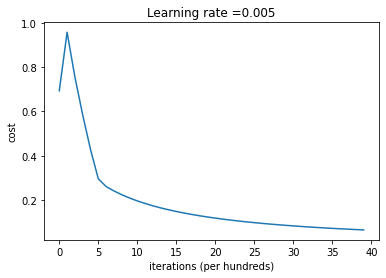

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()